## Hack Princeton Data Preprocessing
By: Adam Li, Andy Tsai, Richard Chen

Using numpy, pandas I/O, DataFrames and JSON processing, we built and cleaned data from the datasets in rugby provided by microsoft.

A rugby field is: 100m x 68m

http://rfuchallenge.azurewebsites.net/

In [3]:
## split -l 517317 Wales\ Away\ Raw\ Data.csv to split datasets and then rename with appendix .csv
import pandas as pd
import numpy as np
# import plotly.plotly as py
# import plotly.graph_objs as go
from matplotlib import pyplot as plt
%matplotlib inline

# read in data
data1 = pd.read_csv("xaa.csv")
data2 = pd.read_csv("xab.csv")
data3 = pd.read_csv("xac.csv")


 The max/min lon/lat
53.2867216667
53.2942983333
-3.71859
13.58218


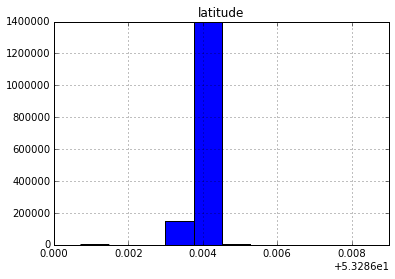

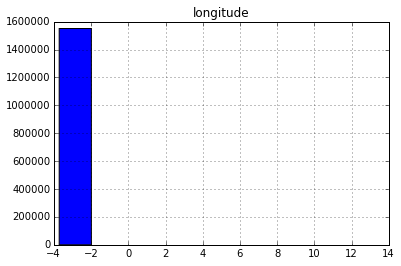

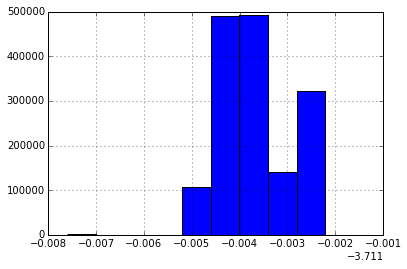

In [5]:
# to reject outliers in a list of data
def reject_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# rename columns accordingly
data1.columns = ["row_id", "player_id", "player_name", "time", "elapsed_time", "lat", "lon", "speed", "heart_rate"]
data2.columns = ["row_id", "player_id", "player_name", "time", "elapsed_time", "lat", "lon", "speed", "heart_rate"]
data3.columns = ["row_id", "player_id", "player_name", "time", "elapsed_time", "lat", "lon", "speed", "heart_rate"]

newdata1 = data1.set_index('row_id')
newdata2 = data2.set_index('row_id')
newdata3 = data3.set_index('row_id')

# merge DataFrame object
frames = [data1, data2, data3]
data = pd.concat(frames)

data = pd.read_csv("Wales Away Raw Data.csv")
data = data.drop(data.columns[7], axis=1)
data.columns = ["player_name", "time", "elapsed_time", "lat", "lon", "speed", "heart_rate"]
# get list of different player IDs = 18
playerIDs = data.index.unique()

# find min and max latitude and longitude
minlat = min(data['lat'])
maxlat = max(data['lat'])
minlon = min(data['lon'])
maxlon = max(data['lon'])

print '\n The max/min lon/lat'
print(minlat)
print(maxlat)
print(minlon)
print(maxlon)

# plot the histogram of latitude and longitude data for outlier rejection
data.lat.hist()
plt.title('latitude')
plt.show()
data.lon.hist()
plt.title('longitude')
plt.show()

# plot new histogram of longitude after outleir rejection
newtemplon = reject_outliers(data.lon)
newtemplon.hist()
plt.show()

# the filter values for latitude and longitude
minfilter = min(newtemplon)
maxfilter = max(newtemplon)



In [128]:
usefilter = 1


# filter out values based on outliers in lon/lat
if usefilter:
    print len(data)
    data = data.loc[(data['lon'] <= maxfilter)]
    data = data.loc[data['lon'] >= minfilter]
    print len(data)

# find min and max latitude and longitude
minlat = min(data['lat'])
maxlat = max(data['lat'])
minlon = min(data['lon'])
maxlon = max(data['lon'])

# scale of the latitude and longitude
latscale = 600.0/float((maxlat - minlat))
lonscale = 68.0*6.0/float((maxlon - minlon))

print minlat
print maxlat
print minlon
print maxlon
print latscale
print lonscale



playerdict = {}
for ID in playerIDs:
    name = data.loc[(data.index == ID)]
    name = name['player_name'].unique()[0]
    playerdict.update({name: ID})
print playerdict

1550522
1550522
53.2867216667
53.2942983333
-3.71859
-3.71261
79190.497141
68227.4247492
{'Will Owen': 1016, 'Charlie Beckett': 1086, 'Kieran Treadwell': 1094, 'Charlie Ewels': 1011, 'Stuart Townsend': 1019, "Piers O'Conor": 1103, 'Max Clark': 1096, 'Josh Bainbridge': 1115, 'Rory Jennings': 1100, 'James Mitchell': 1102, 'James Chisholm': 1009, 'Paul Hill': 1013, 'Howard Packman': 1017, 'George Perkins': 1104, 'Ellis Genge': 1089, 'Jack Walker': 1021, 'Joe Batley': 1085, 'Joe Marchant': 1111}


In [81]:
RawTime = list(data['time'])
UniqueNames = data['player_name'].unique()

for i in range(0, len(RawTime)):
    RawTime[i] = RawTime[i][:8]

data['time'] = RawTime
data.head(5)

,player_name,time,elapsed_time,lat,lon,speed,heart_rate
1021,Jack Walker,19:18:49,0.099999,53.290193,-3.713458,0,0
1021,Jack Walker,19:18:49,0.199999,53.290193,-3.713458,0,0
1021,Jack Walker,19:18:49,0.299998,53.290193,-3.713457,0,0
1021,Jack Walker,19:18:49,0.399997,53.290193,-3.713458,0,0
1021,Jack Walker,19:18:49,0.499997,53.290193,-3.713457,0,0


In [95]:
# Create a dataframe dictionary 
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data["player_name"] == key]
    
# DataFrameDict['Jack Walker']

In [96]:
# concatenate into an array with data/second
for name in UniqueNames:
    PlayerData = DataFrameDict[name]
    PlayerData = PlayerData.groupby('time').agg([np.mean])
    PlayerData['time'] = list(PlayerData.index)
    PlayerData.columns = ['elapsed_time', 'lat', 'lon', "speed", "heart_rate", 'time']
    PlayerData.index = list(PlayerData.index)
    colnames = PlayerData.columns.tolist()
    colnames = colnames[-1:] + colnames[:-1]
    PlayerData = PlayerData[colnames]
    DataFrameDict[name] = PlayerData
    
# DataFrameDict['Jack Walker']

,time,elapsed_time,lat,lon,speed,heart_rate
19:18:49,19:18:49,0.450000,53.290193,-3.713457,0.000000,0.0
19:18:50,19:18:50,1.350000,53.290193,-3.713450,0.000000,0.0
19:18:51,19:18:51,2.350001,53.290194,-3.713445,0.030000,0.0
19:18:52,19:18:52,3.350000,53.290196,-3.713443,0.000000,0.0
19:18:53,19:18:53,4.350000,53.290193,-3.713439,0.000000,0.0
19:18:54,19:18:54,5.350000,53.290190,-3.713432,0.000000,0.0
19:18:55,19:18:55,6.350001,53.290187,-3.713427,0.000000,0.0
19:18:56,19:18:56,7.350000,53.290188,-3.713427,0.000000,0.0
19:18:57,19:18:57,8.349999,53.290190,-3.713427,0.000000,0.0
19:18:58,19:18:58,9.350001,53.290192,-3.713427,0.291945,0.0


In [135]:
import json
playerdict["Jack Walker"]

1021

In [137]:
# show distribution of speed of players
# fig, axs = plt.subplots(len(playerIDs),1)
for name in UniqueNames:
# for i in range(0,1):
    # get the player's data rows
#     playerid = playerIDs[i]
    playerid = playerdict[name]
    #temp = data.loc[data.index == playerid]
    temp = DataFrameDict[name]
    
    # determine the start and end rows of first half
    firststart = np.where(temp.time >= '19:31:34.00')[0][0]
    firstend = np.where(temp.time <= '20:17:36.00')[0]
    firstend = firstend[len(firstend)-1]

    # determine the start and end rows of second half
    secondstart = np.where(temp.time > '20:30:34.00')[0][0]
    secondend = np.where(temp.time < '21:20:26.00')[0]
    secondend = secondend[len(secondend)-1]

    firsthalf = temp.iloc[firststart:firstend]
    secondhalf = temp.iloc[secondstart:secondend]

    # produce json for firsthalf
    firsthalfresponses = []
    for j in range(0, len(firsthalf)):
        # set name
        if j is 0:
            name = "Gimme"
        elif j is len(firsthalf) - 1:
            name = "Proletariat"
        else:
            name = "Along route"

        # get the longitude and latitude
        lat = firsthalf.iloc[j]['lat']
        lon = firsthalf.iloc[j]['lon']
        time = (firsthalf.iloc[j]['time']) #- initialtime

        # convert latitude 
        convertedlat = (lat-minlat)*latscale
        # convert longitude
        convertedlon = (lon-minlon)*lonscale
        
        # get heartrate
        heartrate = firsthalf.iloc[j]['heart_rate']
        
        # get speed
        speed = firsthalf.iloc[j]['speed']
        
        # json per time point
        response = {"type": "Feature",
                    "name": name,
                    "properties": {
                                "latitude": lat,
                                "longitude": lon,
                                "convertedlat": convertedlat,
                                "convertedlon": convertedlon,
                                "time": time,
                                "id": "route1",
                                "name": name,
                                "heartrate": heartrate,
                                "speed": speed
                                }
                    }
        firsthalfresponses.append(response)

    # end json description
    firsthalfjson = {"userID": playerid,
                    "type": "FeatureCollection",
                    "features": firsthalfresponses
                    }
    
    # produce json for secondhalf
    secondhalfresponses = []
    for j in range(0, len(secondhalf)):
        # set name
        if j is 0:
            name = "Gimme"
        elif j is len(secondhalf) - 1:
            name = "Proletariat"
        else:
            name = "Along route"

        # get latitude and longitude
        lat = secondhalf.iloc[j]['lat']
        lon = secondhalf.iloc[j]['lon']
        time = (secondhalf.iloc[j]['time']) #- initialtime

        # convert latitude 
        convertedlat = (lat-minlat)*latscale
        # convert longitude
        convertedlon = (lon-minlon)*lonscale

        # get heartrate
        heartrate = secondhalf.iloc[j]['heart_rate']
        
        # get speed
        speed = secondhalf.iloc[j]['speed']
        
        # json per time point
        response = {"type": "Feature",
                    "name": name,
                    "properties": {
                                "latitude": lat,
                                "longitude": lon,
                                "convertedlat": convertedlat,
                                "convertedlon": convertedlon,
                                "time": time,
                                "id": "route1",
                                "name": name,
                                "heartrate": heartrate,
                                "speed": speed
                                }
        }
        secondhalfresponses.append(response)
    
    # the end json description
    secondhalfjson = {"userID": playerid,
                    "type": "FeatureCollection",
                    "features": secondhalfresponses
                    }
    
    firsthalfjson = json.dumps(firsthalfjson)
    secondhalfjson = json.dumps(secondhalfjson)
    
    # saving into .json file
    firsthalf = (str(playerid) + 'firsthalf_averaged.json')
    print firsthalf
    secondhalf = (str(playerid) + 'secondhalf_averaged.json')
    print secondhalf
    %store firsthalfjson >> $firsthalf
    %store secondhalfjson >> $secondhalf   

1021firsthalf_averaged.json
1021secondhalf_averaged.json
Writing 'firsthalfjson' (str) to file '1021firsthalf_averaged.json'.
Writing 'secondhalfjson' (str) to file '1021secondhalf_averaged.json'.
1094firsthalf_averaged.json
1094secondhalf_averaged.json
Writing 'firsthalfjson' (str) to file '1094firsthalf_averaged.json'.
Writing 'secondhalfjson' (str) to file '1094secondhalf_averaged.json'.
1104firsthalf_averaged.json
1104secondhalf_averaged.json
Writing 'firsthalfjson' (str) to file '1104firsthalf_averaged.json'.
Writing 'secondhalfjson' (str) to file '1104secondhalf_averaged.json'.
1019firsthalf_averaged.json
1019secondhalf_averaged.json
Writing 'firsthalfjson' (str) to file '1019firsthalf_averaged.json'.
Writing 'secondhalfjson' (str) to file '1019secondhalf_averaged.json'.
1017firsthalf_averaged.json
1017secondhalf_averaged.json
Writing 'firsthalfjson' (str) to file '1017firsthalf_averaged.json'.
Writing 'secondhalfjson' (str) to file '1017secondhalf_averaged.json'.
1016firsthalf_a